In [16]:
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, save_img
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Путь до основного каталога
base_dir = './garbage_classification'

# Составление массива классов из папок
garbage_types = ['battery', 'biological', 'cardboard', 'metal', 'paper', 'plastic']

# сбор путей к изображениям и меткам
image_paths = []
image_labels =[]

for garbageType in garbage_types:
    garbage_dir = os.path.join(base_dir, garbageType) # ./garbage_classification/battery
    for namePhoto in os.listdir(garbage_dir):
        image_paths.append(os.path.join(garbage_dir, namePhoto))
        image_labels.append(garbageType)

# Создаем DataFrame: image_paths, image_labels
df = pd.DataFrame({
    'image_path': image_paths,
    'label': image_labels
})
df

,image_path,label
0,./garbage_classification\battery\battery1.jpg,battery
1,./garbage_classification\battery\battery10.jpg,battery
2,./garbage_classification\battery\battery100.jpg,battery
3,./garbage_classification\battery\battery101.jpg,battery
4,./garbage_classification\battery\battery102.jpg,battery
...,...,...
5500,./garbage_classification\plastic\plastic95.jpg,plastic
5501,./garbage_classification\plastic\plastic96.jpg,plastic
5502,./garbage_classification\plastic\plastic97.jpg,plastic
5503,./garbage_classification\plastic\plastic98.jpg,plastic


In [7]:
# Разделяем данные на тренировочную и тестовую выборки в соотношении 70 на 30 процентов для тренировочной и  тестовой соответственно
train_df, test_df = train_test_split(df, test_size=0.3, random_state=23)

In [8]:
# Аугментация данных
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=45,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Создаем генераторы
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'image_path',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_df,
    x_col = 'image_path',
    y_col = 'label',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 3853 validated image filenames belonging to 6 classes.
Found 1652 validated image filenames belonging to 6 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import AdamW

# Создание модели
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

C:\Users\kseny\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Компиляция модели
from tensorflow.keras.optimizers import AdamW
model.compile(
    optimizer=AdamW(learning_rate=0.0005, weight_decay=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# Обучение модели
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = test_generator
)

C:\Users\kseny\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.3358 - loss: 1.7060 - val_accuracy: 0.5769 - val_loss: 1.1803
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.5816 - loss: 1.1672 - val_accuracy: 0.6029 - val_loss: 1.0215
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step - accuracy: 0.6198 - loss: 1.0682 - val_accuracy: 0.6108 - val_loss: 0.9972
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.6391 - loss: 1.0073 - val_accuracy: 0.6217 - val_loss: 0.9717
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.6435 - loss: 0.9849 - val_accuracy: 0.6768 - val_loss: 0.8994
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.6529 - loss: 0.9776 - val_accuracy: 0.6810 - val_loss: 0.8836
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.6720 - loss: 0.9101 - val_accuracy: 0.6786 - val_loss: 0.8513
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.6685 - loss: 0.9097 - val_accu

In [13]:
# Оценка модели
score = model.evaluate(test_generator)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 256ms/step - accuracy: 0.7245 - loss: 0.7646
Test loss: 0.7370513081550598
Test accuracy: 0.7372881174087524


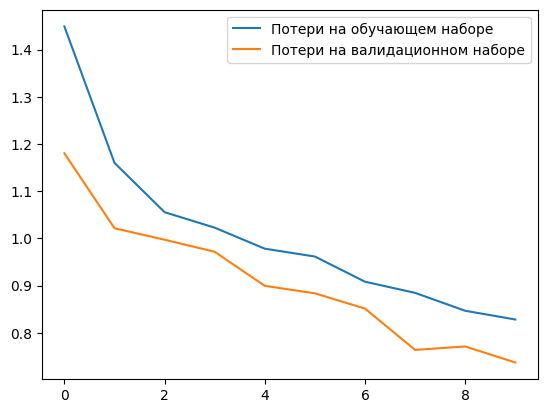

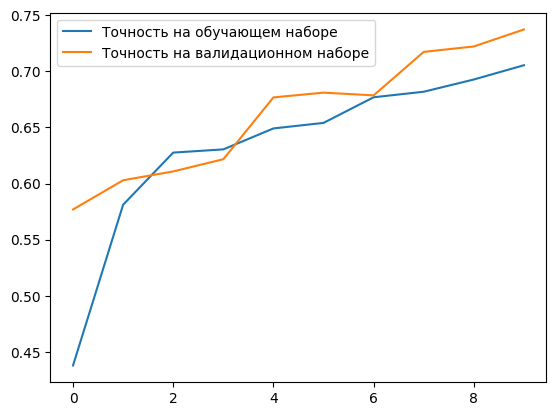

In [14]:
# Визуализация потерь
plt.plot(history.history['loss'], label='Потери на обучающем наборе')
plt.plot(history.history['val_loss'], label='Потери на валидационном наборе')
plt.legend()
plt.show()

# Визуализация точности
plt.plot(history.history['accuracy'], label='Точность на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Точность на валидационном наборе')
plt.legend()
plt.show()

In [15]:
model.save(f'{base_dir}\\Model.h5')